In [89]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
sess = tf.InteractiveSession()

# Linear model for regression

For $n$ samples $(x_i, y_i)_{i=1,\ldots, n}$ :
$$ y_i = w_1 x_i + w_0 $$ 

In [135]:
n_samples = 100
sample_xs = tf.constant(
    value=np.random.uniform(low=0, high=1, size=(n_samples, 1)), 
    name='features')
sample_xs

<tf.Tensor 'features_4:0' shape=(100, 1) dtype=float64>

In [136]:
sample_xs.eval()

array([[ 0.07222816],
       [ 0.71631291],
       [ 0.34911967],
       [ 0.90780175],
       [ 0.82704326],
       [ 0.72326623],
       [ 0.03081856],
       [ 0.91892638],
       [ 0.11516725],
       [ 0.42016109],
       [ 0.86744866],
       [ 0.45653862],
       [ 0.15303493],
       [ 0.12769468],
       [ 0.5008333 ],
       [ 0.91191432],
       [ 0.93349542],
       [ 0.35697315],
       [ 0.18834406],
       [ 0.50651574],
       [ 0.30195773],
       [ 0.85149711],
       [ 0.20996521],
       [ 0.59740228],
       [ 0.68605813],
       [ 0.95276226],
       [ 0.7679581 ],
       [ 0.54698254],
       [ 0.93978846],
       [ 0.96219217],
       [ 0.24774321],
       [ 0.87083347],
       [ 0.97369217],
       [ 0.12624776],
       [ 0.49108814],
       [ 0.63071179],
       [ 0.88318509],
       [ 0.32772388],
       [ 0.90882536],
       [ 0.81553357],
       [ 0.39904576],
       [ 0.91280501],
       [ 0.58100622],
       [ 0.00913004],
       [ 0.90802405],
       [ 0

In [137]:
sample_noises = tf.constant(
    value=np.random.normal(loc=0, scale=.5, size=n_samples),
    shape=(n_samples, 1)
)

d = 2
oracle_w = np.array([1., -2.]).reshape((d, 1))

sample_ys = oracle_w[0] + oracle_w[1] * sample_xs + sample_noises
sample_ys

<tf.Tensor 'add_9:0' shape=(100, 1) dtype=float64>

In [138]:
sample_ys.eval()

array([[  1.30131198e+00],
       [ -2.46293601e-01],
       [  2.82326197e-01],
       [ -1.90964962e+00],
       [ -4.43290812e-01],
       [ -1.07726439e+00],
       [  8.94162229e-01],
       [ -1.24448408e+00],
       [  2.17793804e-01],
       [  6.73063105e-01],
       [ -8.63946343e-01],
       [  2.39156436e-01],
       [  3.71270690e-01],
       [  7.45745973e-02],
       [  1.58981783e-01],
       [ -6.33076779e-02],
       [ -1.10729693e+00],
       [  6.14207597e-01],
       [  5.74188942e-01],
       [ -1.04834740e-01],
       [  2.79102609e-01],
       [ -1.15946180e+00],
       [  8.57730514e-01],
       [ -1.08915452e+00],
       [ -5.33598363e-01],
       [ -5.42756207e-01],
       [ -8.07005003e-01],
       [ -3.07573377e-01],
       [ -7.76135473e-01],
       [ -1.63337787e+00],
       [  6.56290579e-01],
       [ -8.70105807e-01],
       [ -1.28274642e+00],
       [  1.10097784e-01],
       [  3.53718817e-01],
       [ -1.12264578e-01],
       [ -5.74730818e-01],
 

## Vectorized reformulation

[Prof Ng](https://www.youtube.com/watch?v=v4kKgCiF1fo) to the rescue for a refresher about matrix-matrix multiplication :)
$$ \underbrace{\mathbf{y}}_{n \times 1} = \underbrace{\mathbf{X}}_{n \times d} \cdot \underbrace{\mathbf{w}}_{d \times 1} $$

In [139]:
x0 = np.repeat(1.0, n_samples).reshape((n_samples, 1))
x1 = sample_xs.eval()

X = tf.constant(np.hstack([x0, x1]), name='X')
X
X.eval()

array([[ 1.        ,  0.07222816],
       [ 1.        ,  0.71631291],
       [ 1.        ,  0.34911967],
       [ 1.        ,  0.90780175],
       [ 1.        ,  0.82704326],
       [ 1.        ,  0.72326623],
       [ 1.        ,  0.03081856],
       [ 1.        ,  0.91892638],
       [ 1.        ,  0.11516725],
       [ 1.        ,  0.42016109],
       [ 1.        ,  0.86744866],
       [ 1.        ,  0.45653862],
       [ 1.        ,  0.15303493],
       [ 1.        ,  0.12769468],
       [ 1.        ,  0.5008333 ],
       [ 1.        ,  0.91191432],
       [ 1.        ,  0.93349542],
       [ 1.        ,  0.35697315],
       [ 1.        ,  0.18834406],
       [ 1.        ,  0.50651574],
       [ 1.        ,  0.30195773],
       [ 1.        ,  0.85149711],
       [ 1.        ,  0.20996521],
       [ 1.        ,  0.59740228],
       [ 1.        ,  0.68605813],
       [ 1.        ,  0.95276226],
       [ 1.        ,  0.7679581 ],
       [ 1.        ,  0.54698254],
       [ 1.        ,

In [140]:
y = tf.add(tf.matmul(X, oracle_w), sample_noises, name='y')
y

<tf.Tensor 'y_4:0' shape=(100, 1) dtype=float64>

In [141]:
y.eval()

array([[  1.30131198e+00],
       [ -2.46293601e-01],
       [  2.82326197e-01],
       [ -1.90964962e+00],
       [ -4.43290812e-01],
       [ -1.07726439e+00],
       [  8.94162229e-01],
       [ -1.24448408e+00],
       [  2.17793804e-01],
       [  6.73063105e-01],
       [ -8.63946343e-01],
       [  2.39156436e-01],
       [  3.71270690e-01],
       [  7.45745973e-02],
       [  1.58981783e-01],
       [ -6.33076779e-02],
       [ -1.10729693e+00],
       [  6.14207597e-01],
       [  5.74188942e-01],
       [ -1.04834740e-01],
       [  2.79102609e-01],
       [ -1.15946180e+00],
       [  8.57730514e-01],
       [ -1.08915452e+00],
       [ -5.33598363e-01],
       [ -5.42756207e-01],
       [ -8.07005003e-01],
       [ -3.07573377e-01],
       [ -7.76135473e-01],
       [ -1.63337787e+00],
       [  6.56290579e-01],
       [ -8.70105807e-01],
       [ -1.28274642e+00],
       [  1.10097784e-01],
       [  3.53718817e-01],
       [ -1.12264578e-01],
       [ -5.74730818e-01],
 

## Visualisation

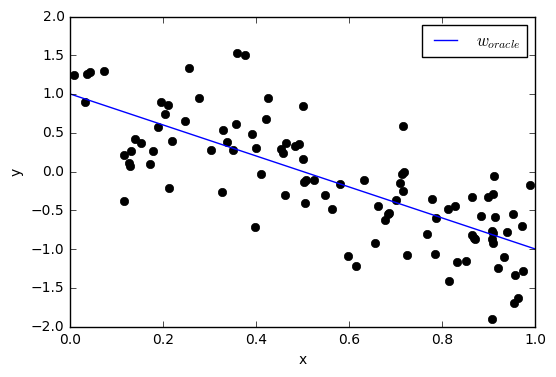

In [142]:
def fitted_line(w, x_lim, **plot_args):
    x_0, x_1 = x_lim
    y_0, y_1 = w[0] + w[1] * np.array(x_lim)
    plt.plot(x_lim, [y_0, y_1], **plot_args)
    
plt.plot(sample_xs.eval(), sample_ys.eval(), 'ko')
fitted_line(oracle_w, plt.xlim(), label='$w_{oracle}$')
plt.legend(); plt.xlabel('x'); plt.ylabel('y');

# Exercise

Write a procedure to return $\hat{\mathbf{w}}$ an estimator of $\mathbf{w}$ from our model, and plot the fitted model on the graph.
Many ways to achieve the results:

 * use a very high level wrapper from `sklearn` (look at LinearRegression or SgdRegressor)
 * use the numpy or tensorflow matrix inversion to solve analytically the OLS equation $ \hat{\mathbf{w}} = (\mathbf{X}^{T} \mathbf{X})^{-1} \mathbf{X}^{T} \mathbf{y}$
 * write a stochastic gradient procedure using tensorflow (https://github.com/aymericdamien/TensorFlow-Examples has a nice example)
 * For the brave, derive analytically the gradients and write you own SG or SGD 

In [143]:
# Parameters

learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [144]:
rng = np.random
# Launch the graph in a session.

In [145]:
# tf Graph Input
train_X = x1
train_Y = sample_ys.eval()
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")
sess.run(W.initializer)
sess.run(b.initializer)

In [146]:
# Construct a linear model
pred = tf.add(tf.mul(X, W), b)
n_samples

100

In [147]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [148]:
# Initializing the variables
init = tf.initialize_all_variables()

Epoch:   50, cost=0.676100373 W=-0.9855477809906006 b=-0.6053057909011841
Epoch:  100, cost=0.326752245 W=-0.8230841755867004 b=-0.2280891388654709
Epoch:  150, cost=0.230715424 W=-0.7604296803474426 b=-0.021857166662812233
Epoch:  200, cost=0.201783672 W=-0.748406171798706 b=0.09612257033586502
Epoch:  250, cost=0.190783799 W=-0.7617677450180054 b=0.1683744341135025
Epoch:  300, cost=0.184722021 W=-0.7875603437423706 b=0.21676364541053772
Epoch:  350, cost=0.180157244 W=-0.8191452026367188 b=0.2525360584259033
Epoch:  400, cost=0.176169813 W=-0.8531317114830017 b=0.28148287534713745
Epoch:  450, cost=0.172506735 W=-0.887789249420166 b=0.3065890967845917
Epoch:  500, cost=0.169090196 W=-0.922256350517273 b=0.3294004499912262
Epoch:  550, cost=0.165890232 W=-0.9560998678207397 b=0.35072141885757446
Epoch:  600, cost=0.162889436 W=-0.9891175627708435 b=0.37097451090812683
Epoch:  650, cost=0.160074577 W=-1.0212198495864868 b=0.3903871178627014
Epoch:  700, cost=0.157433718 W=-1.052378058

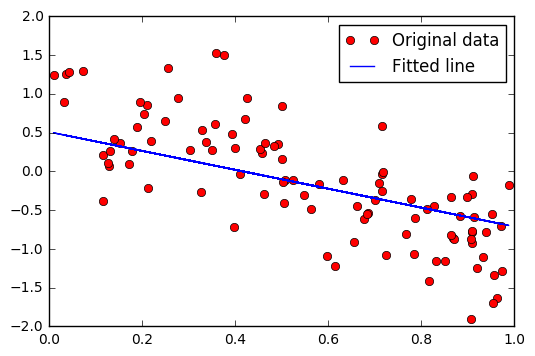

In [149]:
# Launch the graph
# Fit all training data
for epoch in range(training_epochs):
    for (x, y) in zip(train_X, train_Y):
        sess.run(optimizer, feed_dict={X: x, Y: y})

    #Display logs per epoch step
    if (epoch+1) % display_step == 0:
        c = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
        print("Epoch: {:4d}, cost={:.9f} W={} b={}".format(epoch+1, c, sess.run(W), sess.run(b)))

print("Optimization Finished!")
training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

#Graphic display
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
plt.legend()
plt.show()